In [2]:
import pandas as pd
import seaborn as sns

df=pd.read_csv('Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [6]:
df1=df.copy()

In [7]:
df1=df1.rename({'Marital.Status':'ms'},axis=1)

In [8]:
df1.head()

,Undergrad,ms,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [9]:
df1.Undergrad.replace(('NO','YES'),(0,1),inplace=True)

In [10]:
df1.head()

,Undergrad,ms,Taxable.Income,City.Population,Work.Experience,Urban
0,0,Single,68833,50047,10,YES
1,1,Divorced,33700,134075,18,YES
2,0,Married,36925,160205,30,YES
3,1,Single,50190,193264,15,YES
4,0,Married,81002,27533,28,NO


In [11]:
df1.ms.replace(('Single','Divorced','Married'),(0,1,2),inplace=True)

In [12]:
df1.head()

,Undergrad,ms,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,68833,50047,10,YES
1,1,1,33700,134075,18,YES
2,0,2,36925,160205,30,YES
3,1,0,50190,193264,15,YES
4,0,2,81002,27533,28,NO


In [13]:
df1.Urban.replace(('NO','YES'),(0,1),inplace=True)

In [14]:
df1.head()

,Undergrad,ms,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,68833,50047,10,1
1,1,1,33700,134075,18,1
2,0,2,36925,160205,30,1
3,1,0,50190,193264,15,1
4,0,2,81002,27533,28,0


In [15]:
df1=df1.drop(['City.Population'],axis=1)

In [16]:
df1.head()

,Undergrad,ms,Taxable.Income,Work.Experience,Urban
0,0,0,68833,10,1
1,1,1,33700,18,1
2,0,2,36925,30,1
3,1,0,50190,15,1
4,0,2,81002,28,0


In [17]:
col=list(df1)
col

['Undergrad', 'ms', 'Taxable.Income', 'Work.Experience', 'Urban']

In [19]:
df1=df1[col[0:2]+col[3:6]+[col[2]]]
df1.head()
    

,Undergrad,ms,Work.Experience,Urban,Taxable.Income
0,0,0,10,1,68833
1,1,1,18,1,33700
2,0,2,30,1,36925
3,1,0,15,1,50190
4,0,2,28,0,81002


In [20]:
X=df1.drop(['Taxable.Income'],axis=1)
X

,Undergrad,ms,Work.Experience,Urban
0,0,0,10,1
1,1,1,18,1
2,0,2,30,1
3,1,0,15,1
4,0,2,28,0
...,...,...,...,...
595,1,1,7,1
596,1,1,2,1
597,0,1,0,1
598,1,2,17,0


In [27]:
y=df1['Taxable.Income']
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income, Length: 600, dtype: int64

In [25]:
df1.loc[df['Taxable.Income']>30000,'Taxable.Income']=1

In [26]:
df1.loc[df['Taxable.Income']<30000,'Taxable.Income']=0

In [28]:
y.head(40)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    1
12    0
13    1
14    1
15    1
16    0
17    1
18    1
19    0
20    1
21    0
22    1
23    1
24    1
25    1
26    1
27    1
28    0
29    1
30    1
31    1
32    1
33    1
34    0
35    1
36    0
37    1
38    0
39    1
Name: Taxable.Income, dtype: int64

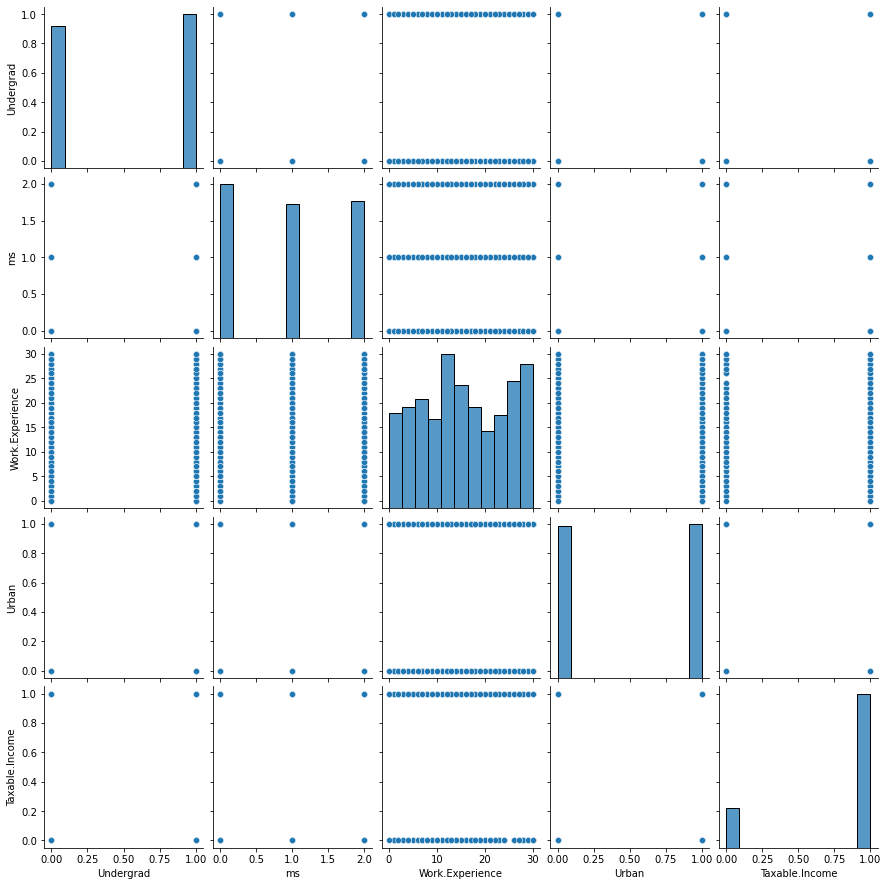

In [30]:
sns.pairplot(df1)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [29]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((480, 4), (120, 4), (480,), (120,))

In [ ]:
#Model building & Selection

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [35]:
array=df1.values
x=df1.iloc[:,0:4]
x

,Undergrad,ms,Work.Experience,Urban
0,0,0,10,1
1,1,1,18,1
2,0,2,30,1
3,1,0,15,1
4,0,2,28,0
...,...,...,...,...
595,1,1,7,1
596,1,1,2,1
597,0,1,0,1
598,1,2,17,0


In [36]:
Y=df1.iloc[:,4:]
Y

,Taxable.Income
0,1
1,1
2,1
3,1
4,1
...,...
595,1
596,1
597,1
598,1


In [44]:
num_trees = 96
max_features = 4
kfold = KFold(n_splits=8, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, Y, cv=kfold)
print(results.mean())

0.6966666666666667


In [45]:
#AdaBoost

In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [47]:
array = df1.values

x = array[:,0:4]
Y = array[:,4:]

num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, Y, cv=kfold)
print(results.mean())

0.7933333333333332


In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN


In [69]:
array = df1.values
x = array[:,0:4]
Y = array[:,4:]
kfold = KFold(n_splits=8, random_state=42)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))

model2 = DecisionTreeClassifier()
estimators.append(('gini', model2))

model3 = SVC()
estimators.append(('svm', model3))

model4=KNN(n_neighbors=7)
estimators.append(('KNN',model4))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, Y, cv=kfold)
print(results.mean())

0.7883333333333333
